In [2]:
# entire code is being run on an Ubuntu kernel. 
# not many QoL libraries are needed.
# your mileage may vary.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# training specific imports
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# AI imports
import torch
import torchvision

# statistics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support, roc_curve

# test if GPU acceleration is working
torch.cuda.is_available()

True

In [3]:
# load dataset annotations file
annot = pd.read_csv('./disaster-dataset/annotations.csv', delimiter=';')
annot.head()

,id,filename,A1.Q1,A1.Q2,A1.Q3.1,A1.Q3.2,A1.Q3.3,A1.Q3.4,A1.Q3.5,A1.Q3.6,...,A5.Q4.8,A5.Q4.9,A5.Q4.10,A5.Q5.1,A5.Q5.2,A5.Q5.3,A5.Q5.4,A5.Q5.5,A5.Q5.6,A5.Q5.7
0,052464df-5fdb-428a-9a4a-6036ea023b42,052464df-5fdb-428a-9a4a-6036ea023b42.jpg,4,7,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,2ce9b1bc-ee70-4128-85d1-0fd3ac272619,2ce9b1bc-ee70-4128-85d1-0fd3ac272619.jpg,6,5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2280b9f3-6989-4222-a0d9-ec4bd35d731b,2280b9f3-6989-4222-a0d9-ec4bd35d731b.jpg,7,9,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,257a8e84-7738-49e2-9945-7f082bf7ad34,257a8e84-7738-49e2-9945-7f082bf7ad34.jpg,1,5,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,3f6b222a-049c-4803-9cbb-5ea734110ed0,3f6b222a-049c-4803-9cbb-5ea734110ed0.jpg,1,9,0,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [4]:
annot.isna().sum().sum() == 0

True

### FIND A WAY TO CONDENSE 132 COLUMNS DOWN

15/9/23 Update: Solved with the help of a professor. Every annotator is now a valid output, and the data is to be trained using Cross Validation. See [ISSUE #8](https://github.com/projectayre/ayre/issues/8) for more details

In [5]:
questions = np.array(list(set([i[3:] for i in annot.columns[2:]])))

In [6]:
questions.sort()
questions

array(['Q1', 'Q2', 'Q3.1', 'Q3.2', 'Q3.3', 'Q3.4', 'Q3.5', 'Q3.6', 'Q3.7',
       'Q4.1', 'Q4.10', 'Q4.2', 'Q4.3', 'Q4.4', 'Q4.5', 'Q4.6', 'Q4.7',
       'Q4.8', 'Q4.9', 'Q5.1', 'Q5.2', 'Q5.3', 'Q5.4', 'Q5.5', 'Q5.6',
       'Q5.7'], dtype='<U5')

I will rename these using the proper names given to them in [info.txt](./disaster-dataset/info.txt)

In [19]:
values = ['sentiment polarity', 'stimulation and excitement', # Continuous output (1-9, needs normalization)
          'Joy', 'Sadness', 'Fear', 'Disgust', 'Anger', 'Surpise', 'Neutral', # Category 1 (Major emotion)
          'Anger', 'Anxiety', 'Craving', 'Emphatic pain', 'Fear', 'Horror', 
          'Joy', 'Relief', 'Sadness', 'Surprise', # Category 2 (Specific emotion)
          'Human facial expression gesture', 'Inherent image property', 'Image background', 
          'Objects in image', 'Text in image', 'Emoji sticker', 'Halo effect'] # Category 3 (Reason for emotion)
rename_dict = dict(zip(questions, values))
len(rename_dict) == len(questions) # Inconsistency has been resolved.

False

There is the mistake in the dataset, Q4 is supposed only has 9 categories, and Q5 7. However, Q4 has 10 and Q5 has 6. I'm not sure what to do here. 

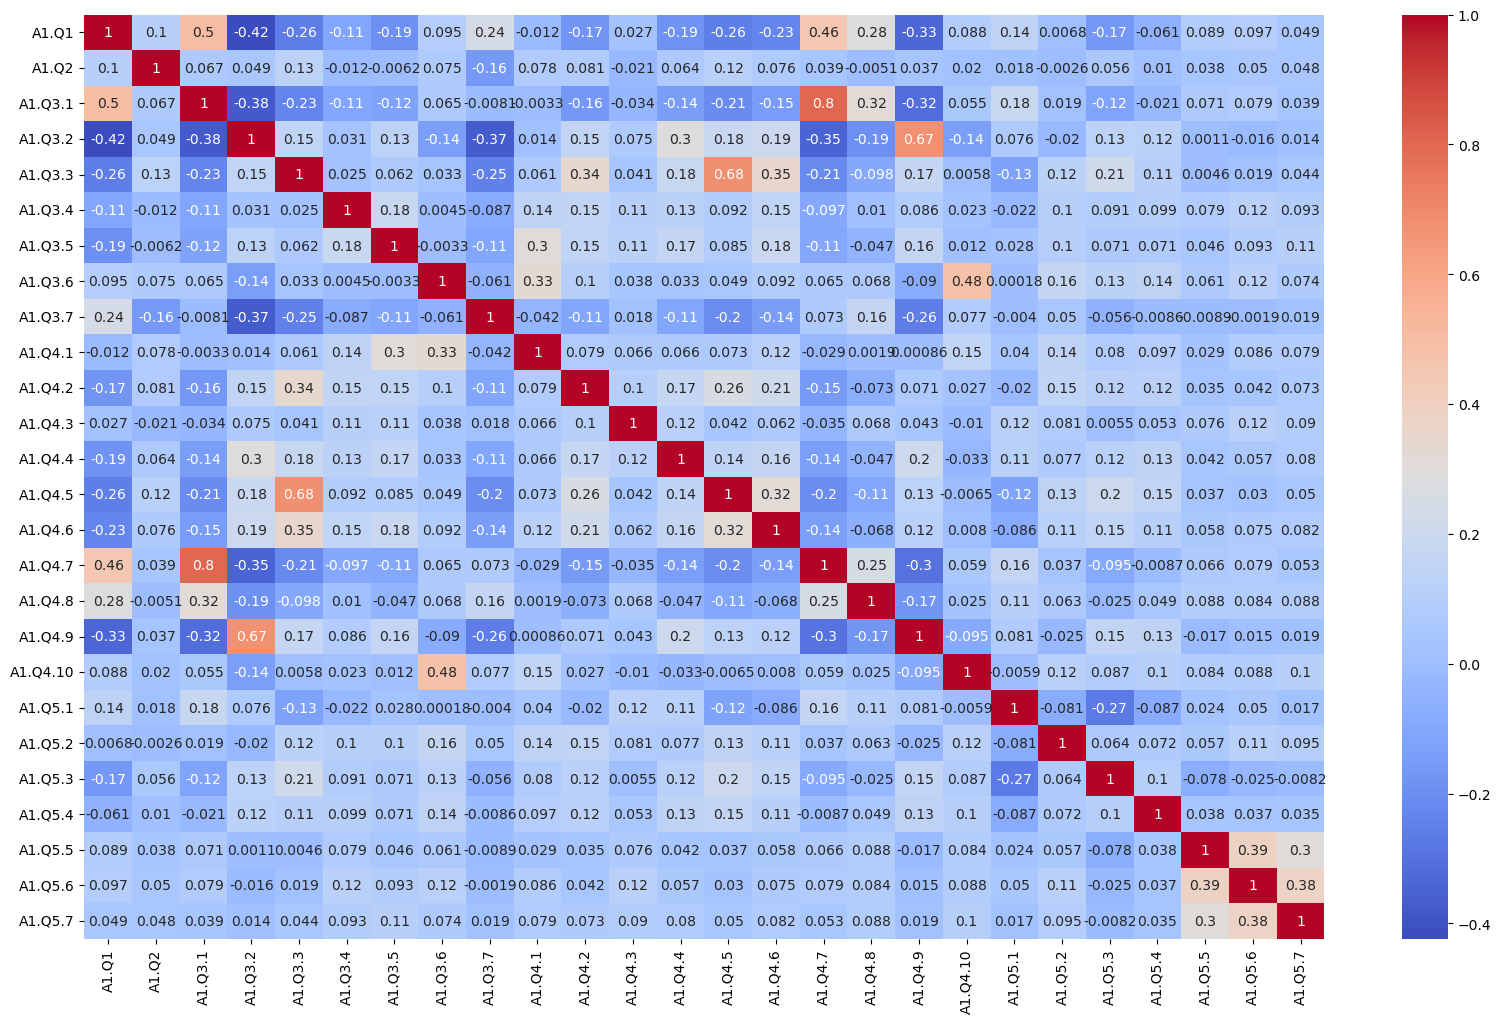

In [16]:
iso = annot.iloc[:, 2:28]
plt.figure(figsize=(20, 12))
sns.heatmap(iso.corr(), cmap='coolwarm', annot=True)
plt.show()